In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elbrinetdupras","key":"f3e872c9e4232e6855ec531ca08b8da4"}'}

Connec to kaggle using kaggle API

In [2]:
!pip install -q kaggle 

In [3]:
# Kaggle API expects this file to be in ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# below avoids change avoids warning on kaggle tool start up. Setup complete
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Creating directory and changing the current working direct..
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [5]:
# Search for data
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          72651        907  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           9433        239  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            337          8  0.75             
bhavinmoriya/german-traffic-sign-recognition-bench

In [6]:
# download dataset
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign 
%cd ..

100% 612M/612M [00:06<00:00, 156MB/s]
100% 612M/612M [00:06<00:00, 103MB/s]
/content


In [7]:
# unzip data and remove unusable files
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset/
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta 
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

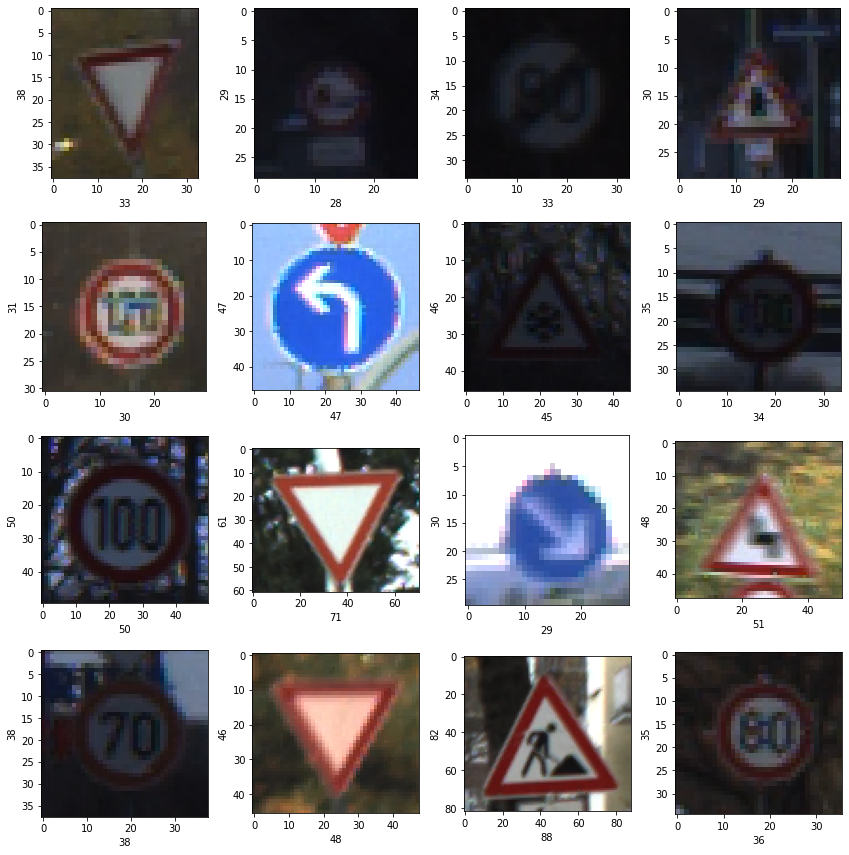

In [16]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [19]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [20]:
#Print mean of dim of images
print("Dimension 1 mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [23]:
from posix import listdir
# reshape images tp (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [24]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [25]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [26]:
images.shape

(39209, 50, 50, 3)

In [27]:
# Visualize the number of class count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [29]:
#splt data 
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size= 0.2, random_state= 42)

In [30]:
#keras has built-in function for one-hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [31]:
#Convert class column into catergorical using to_cater... function 
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [33]:
#Define the model architecture. In this we will define all thw layers with their input shape, kernel size, acivation ...etc
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [34]:
#complie model using metrics, optimizer and loss as required and pritning out the summary model

model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)


Epoch 1/10
246/246 - 251s - loss: 2.6291 - accuracy: 0.2919 - val_loss: 1.3832 - val_accuracy: 0.6182 - 251s/epoch - 1s/step
Epoch 2/10
246/246 - 245s - loss: 1.3065 - accuracy: 0.5986 - val_loss: 0.5851 - val_accuracy: 0.8744 - 245s/epoch - 998ms/step
Epoch 3/10
246/246 - 259s - loss: 0.8269 - accuracy: 0.7350 - val_loss: 0.3329 - val_accuracy: 0.9306 - 259s/epoch - 1s/step
Epoch 4/10
246/246 - 262s - loss: 0.6279 - accuracy: 0.7960 - val_loss: 0.2226 - val_accuracy: 0.9592 - 262s/epoch - 1s/step
Epoch 5/10
246/246 - 231s - loss: 0.5131 - accuracy: 0.8356 - val_loss: 0.1812 - val_accuracy: 0.9712 - 231s/epoch - 940ms/step
Epoch 6/10
246/246 - 216s - loss: 0.4427 - accuracy: 0.8556 - val_loss: 0.1234 - val_accuracy: 0.9777 - 216s/epoch - 878ms/step
Epoch 7/10
246/246 - 194s - loss: 0.3881 - accuracy: 0.8734 - val_loss: 0.1037 - val_accuracy: 0.9815 - 194s/epoch - 787ms/step
Epoch 8/10
246/246 - 196s - loss: 0.3544 - accuracy: 0.8852 - val_loss: 0.0897 - val_accuracy: 0.9783 - 196s/epoc

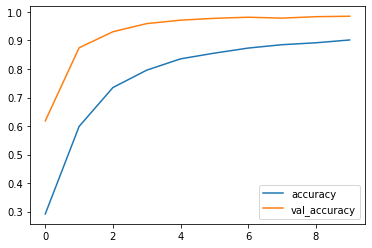

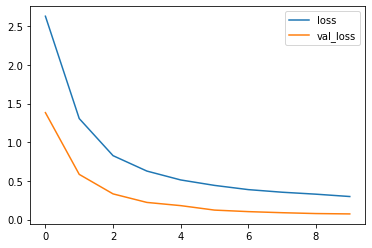

In [35]:
evalutation = pd.DataFrame(model.history.history)
evalutation[['accuracy', 'val_accuracy']].plot()
evalutation[['loss', 'val_loss']].plot()

In [56]:

#Next visualize the accuracy and loss per epoch. for this we will store the model history in the pandas dataframe and plot them
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv



In [57]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    
    #Convert images to np array
    images = np.array(images)
    
    #Pixel value of each image ranges between 0 abd 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images


In [58]:
#Creating a funtion to resize test images converting them into np array and normailze them
test_images = scaling(sorted(os.listdir(test_path)),test_path)


In [59]:
#calling the above created function on test images
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test


array([16,  1, 38, ...,  6,  7, 10])

In [61]:
#next read label IDs from test.csv and store values og the class id in y_test variable.
y_pred = model.predict_classes(test_images);
y_pred


AttributeError: ignored

In [45]:
# Storing all labels
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']
              

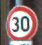

In [46]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img


In [47]:
# orginial label 
print("Original Label : ", all_labels[y_test[1]])


Original Label :  Speed limit (30km/h)


In [62]:
# Predicted label 
print("Predicted label : ", all_labels[y_pred[1]])


NameError: ignored

This model can be used in self driving cars 